<a href="https://colab.research.google.com/github/viggopatel/QM2-real/blob/main/Pirate_x_HDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install Basemap
!pip install ipyleaflet

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab
from datetime import datetime

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 8)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/Viggo IMB-Piracy attacks dataset-v4 - data-for-countries-etc-by-year.csv')
df2 = pd.read_csv('/content/drive/MyDrive/hdidatafr.csv')

In [6]:
df1['Year'] = df1['Year'].astype(str)
df1 = df1[df1['Year'] < '2021']

In [7]:
df1

,geo,name,Year,Number of pirate attacks,Latitude,Longitude
0,dza,Algeria,2012,1,28.0339° N,1.6596° E
1,dza,Algeria,2013,0,28.0339° N,1.6596° E
2,dza,Algeria,2014,0,28.0339° N,1.6596° E
3,dza,Algeria,2015,0,28.0339° N,1.6596° E
4,dza,Algeria,2016,0,28.0339° N,1.6596° E
...,...,...,...,...,...,...
484,vnm,Vietnam,2017,2,14.0583° N,108.2772° E
485,vnm,Vietnam,2018,4,14.0583° N,108.2772° E
486,vnm,Vietnam,2019,2,14.0583° N,108.2772° E
487,vnm,Vietnam,2020,4,14.0583° N,108.2772° E


In [25]:
df2

,country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Latitutde,Longitude
0,Algeria,0.721,0.727,0.729,0.731,0.735,0.740,0.743,0.744,0.745,0.748,0.736,28.0339° N,1.6596° E
1,Angola,0.510,0.526,0.541,0.552,0.563,0.582,0.596,0.597,0.595,0.595,0.590,11.2027° S,17.8739° E
2,Bangladesh,0.553,0.561,0.572,0.574,0.583,0.602,0.612,0.622,0.635,0.644,0.655,24°N,90°E
3,Benin,0.492,0.499,0.509,0.520,0.524,0.529,0.530,0.530,0.530,0.530,0.524,9.3077° N,2.3158° E
4,Brazil,0.723,0.728,0.732,0.750,0.754,0.753,0.755,0.759,0.764,0.766,0.758,14.235° S,51.9253° W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


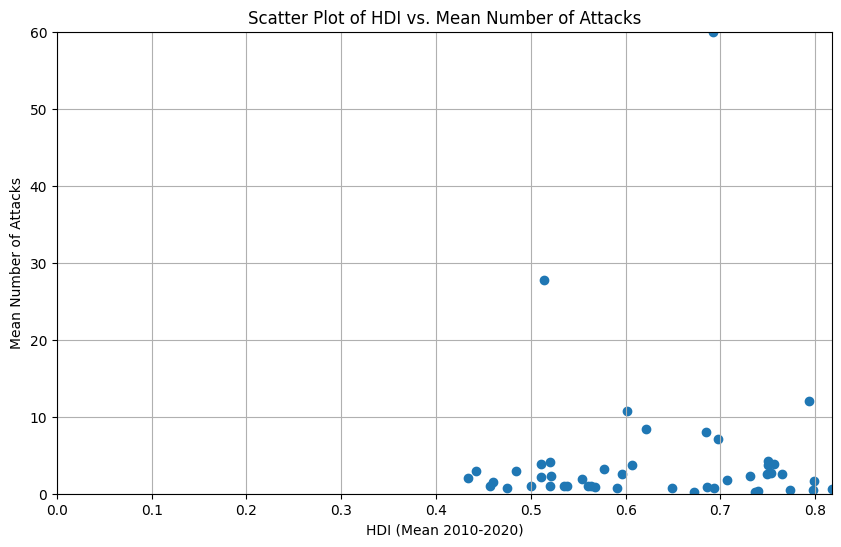

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Rename the 'Name' column to 'country' in df1
df1 = df1.rename(columns={'name': 'country'})

# Calculate the mean HDI for the years 2010-2020
hdi_mean = df2.loc[:, '2010':'2020'].mean(axis=1)

# Convert hdi_mean to DataFrame with country as index, then reset index to have country as a column
hdi_mean_df = pd.DataFrame(hdi_mean, columns=['HDI_Mean']).set_index(df2['country']).reset_index()

# Calculate mean Pirate attacks, grouped by country and reset index to have country as a column
attacks_mean_df = df1.groupby('country')['Number of pirate attacks'].mean().reset_index()

# Merge the two DataFrames on country
merged_df = pd.merge(attacks_mean_df, hdi_mean_df, on='country')

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['HDI_Mean'], merged_df['Number of pirate attacks'])
plt.xlabel('HDI (Mean 2010-2020)')
plt.ylabel('Mean Number of Attacks')
plt.title('Scatter Plot of HDI vs. Mean Number of Attacks')
plt.grid(True)

# Set axis limits to start at 0
plt.xlim(0, merged_df['HDI_Mean'].max())
plt.ylim(0, merged_df['Number of pirate attacks'].max())

plt.show()

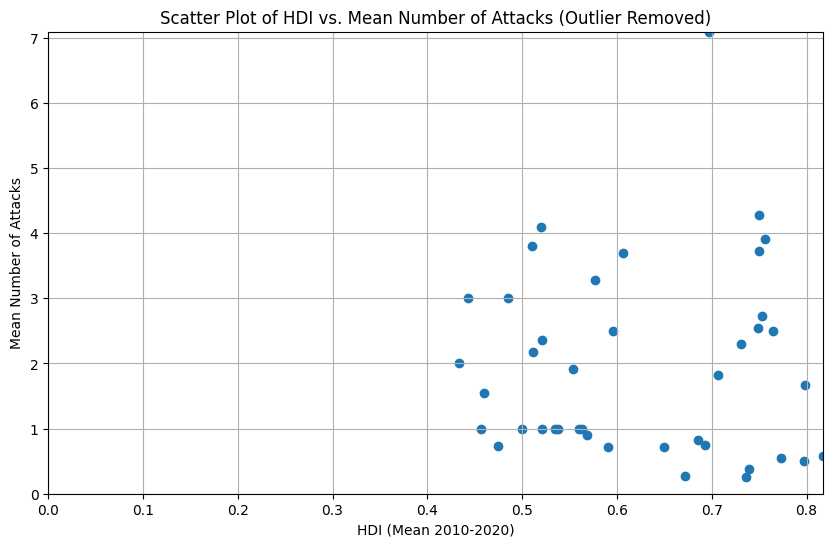

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (previous code for calculating and merging mean HDI and mean attacks)

# Calculate IQR for 'Pirate attacks on boats'
Q1 = merged_df['Number of pirate attacks'].quantile(0.25)
Q3 = merged_df['Number of pirate attacks'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = merged_df[(merged_df['Number of pirate attacks'] >= lower_bound) & (merged_df['Number of pirate attacks'] <= upper_bound)]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['HDI_Mean'], filtered_df['Number of pirate attacks'])  # Use 'Pirate attacks on boats' for y-axis
plt.xlabel('HDI (Mean 2010-2020)')
plt.ylabel('Mean Number of Attacks')
plt.title('Scatter Plot of HDI vs. Mean Number of Attacks (Outlier Removed)')
plt.grid(True)

# Set axis limits to start at 0
plt.xlim(0, filtered_df['HDI_Mean'].max())
plt.ylim(0, filtered_df['Number of pirate attacks'].max())  # Use 'Pirate attacks on boats' for y-axis limit

plt.show()

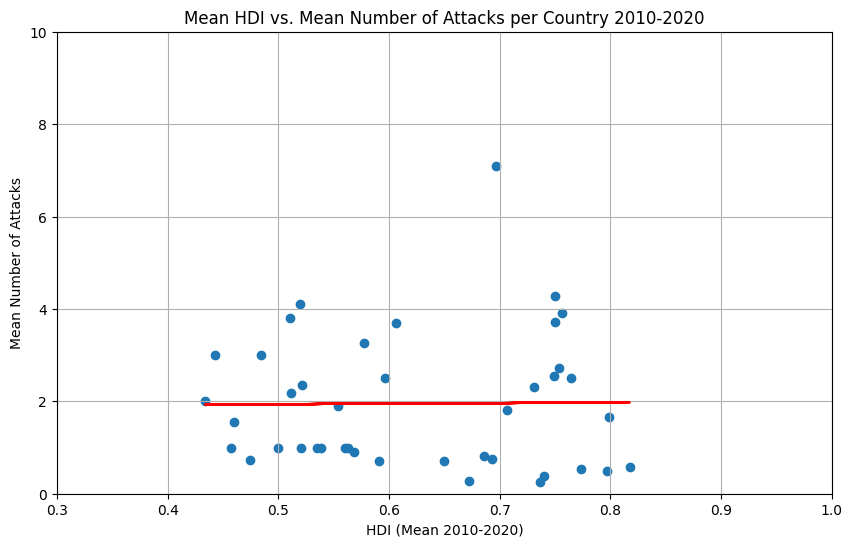

In [17]:
# prompt: add a line of best fit, start the x axis at 0.3 and extend it to 1, start the y axis at 0 and extend it to 10

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab
from datetime import datetime
from google.colab import drive
# %%capture
# !pip install Basemap
# !pip install ipyleaflet

%matplotlib inline

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['HDI_Mean'], filtered_df['Number of pirate attacks'])  # Use 'Pirate attacks on boats' for y-axis
plt.xlabel('HDI (Mean 2010-2020)')
plt.ylabel('Mean Number of Attacks')
plt.title('Mean HDI vs. Mean Number of Attacks per Country 2010-2020')
plt.grid(True)

# Calculate the line of best fit
m, b = np.polyfit(filtered_df['HDI_Mean'], filtered_df['Number of pirate attacks'], 1)

# Add the line of best fit to the plot
plt.plot(filtered_df['HDI_Mean'], m * filtered_df['HDI_Mean'] + b, color='red')


# Set axis limits
plt.xlim(0.3, 1)
plt.ylim(0, 10)

plt.show()

In [18]:
# prompt: provide a regression table for this variable

import statsmodels.api as sm

# ... (your existing code)

# Add a constant to the independent variable for the regression
X = sm.add_constant(filtered_df['HDI_Mean'])
y = filtered_df['Number of pirate attacks']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the regression table
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Number of pirate attacks   R-squared:                       0.000
Model:                                  OLS   Adj. R-squared:                 -0.026
Method:                       Least Squares   F-statistic:                  0.003791
Date:                      Wed, 08 Jan 2025   Prob (F-statistic):              0.951
Time:                              14:23:45   Log-Likelihood:                -73.099
No. Observations:                        41   AIC:                             150.2
Df Residuals:                            39   BIC:                             153.6
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------